# **Assignment 11**
## **Recommendation System**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
%matplotlib inline

# Load the data

In [ ]:
df = pd.read_csv('anime Project11.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175



## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:

df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
df['episodes'].replace('Unknown',None, inplace=True)

In [ ]:

df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       None, '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87'

In [ ]:
pd.to_numeric(df['episodes'])

,episodes
0,1.0
1,64.0
2,51.0
3,24.0
4,51.0
...,...
12289,1.0
12290,1.0
12291,4.0
12292,1.0


In [ ]:
df['episodes']=pd.to_numeric(df['episodes'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [ ]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06



* There are 12294 records and rating column has 12064 entries, i.e. 230 missing entries are in the rating column


* Also in episode column 340 missing entries
* mean of anime_id column is 14058 and median is 10260, i.e. anime_id column is positively skewed
* difference between 75th percentile and max is huge in episodes column, which implies there are possible outliers at higher side
* rating column seems symmetric
* for members column also mean is greater than median, so members column is also positively skewed
  



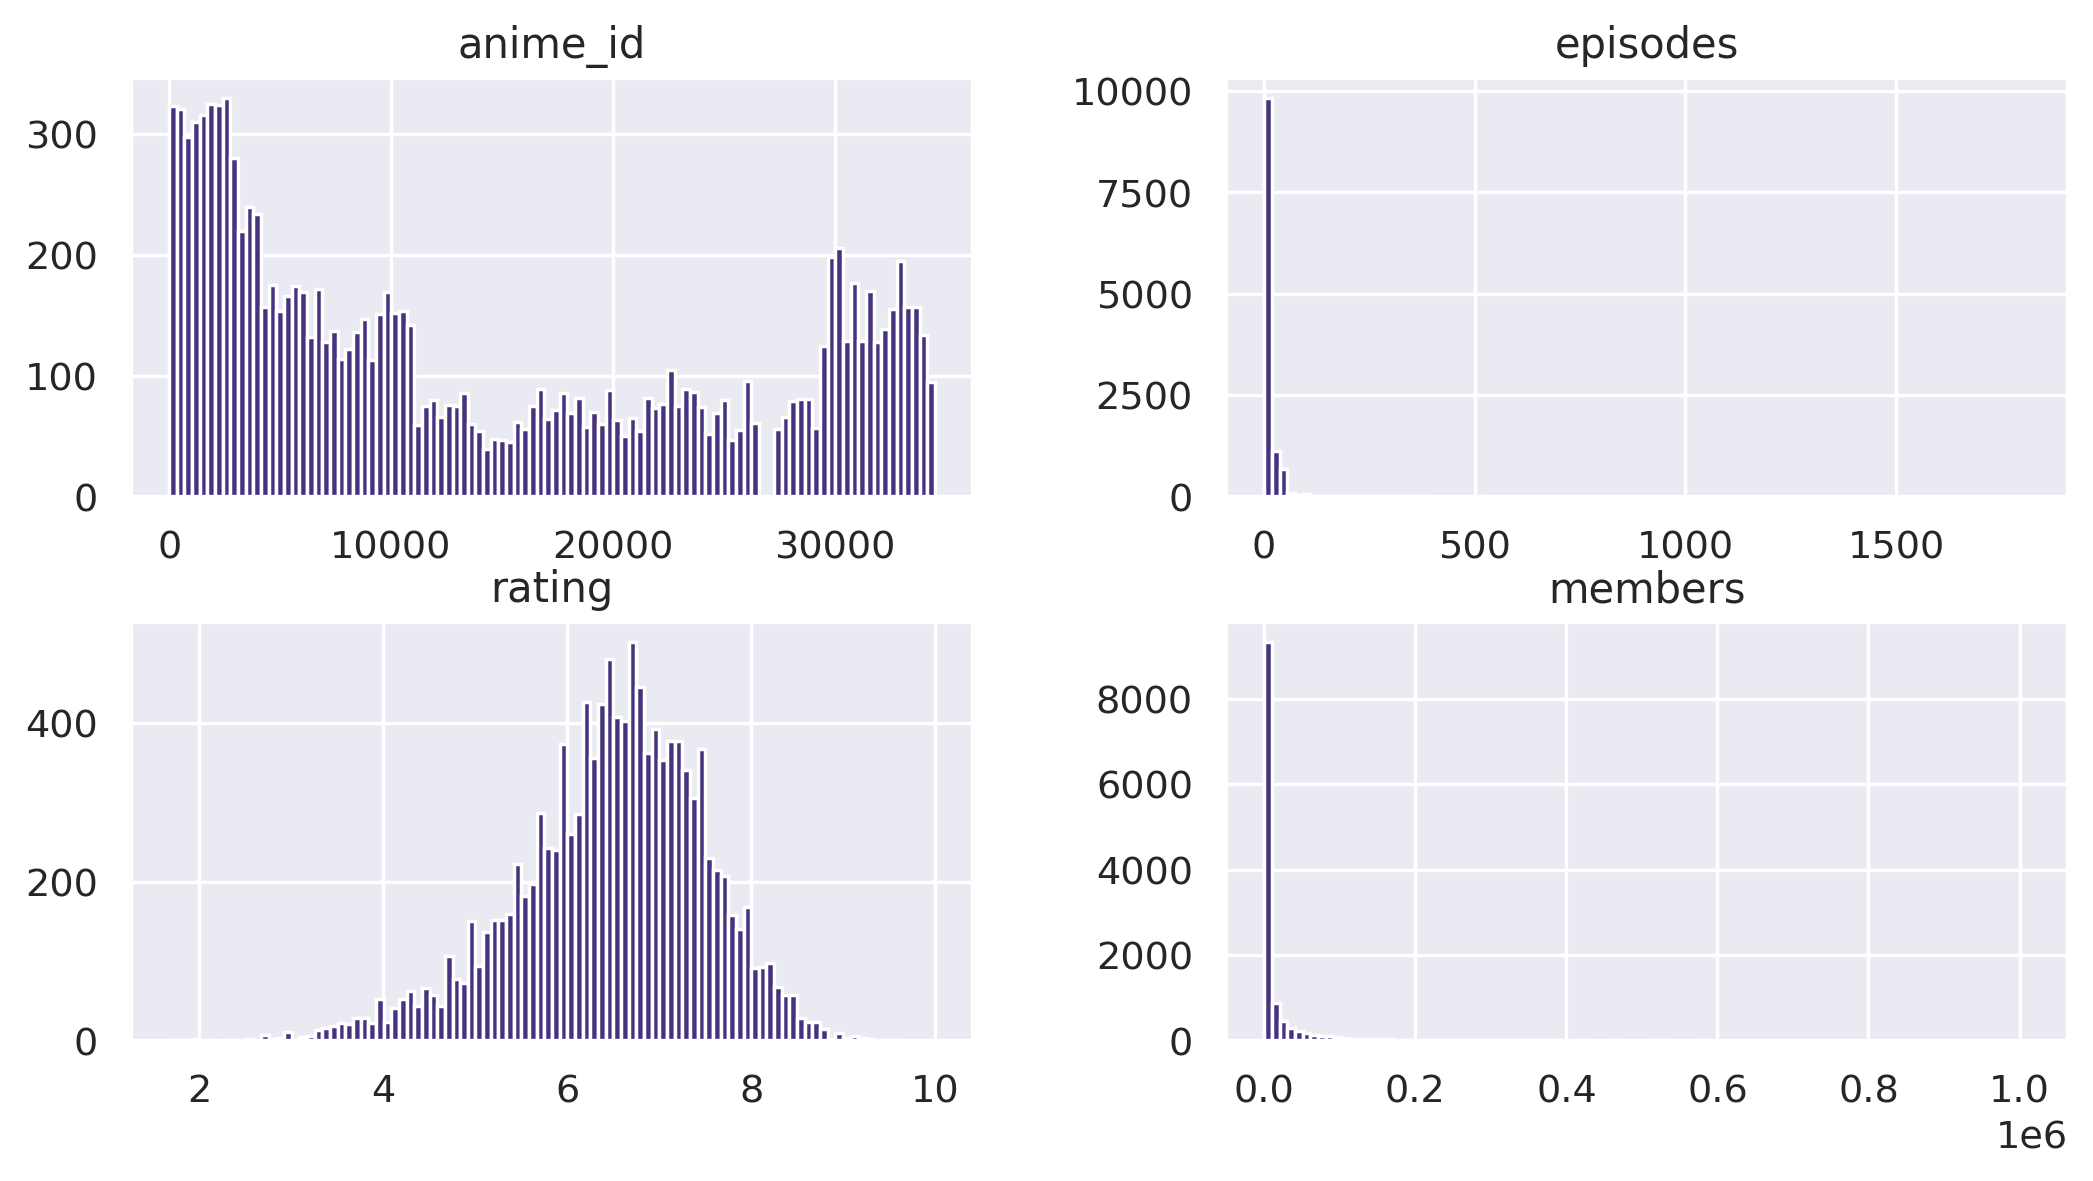

In [ ]:
df.hist(bins=100)
plt.show()

<Axes: >

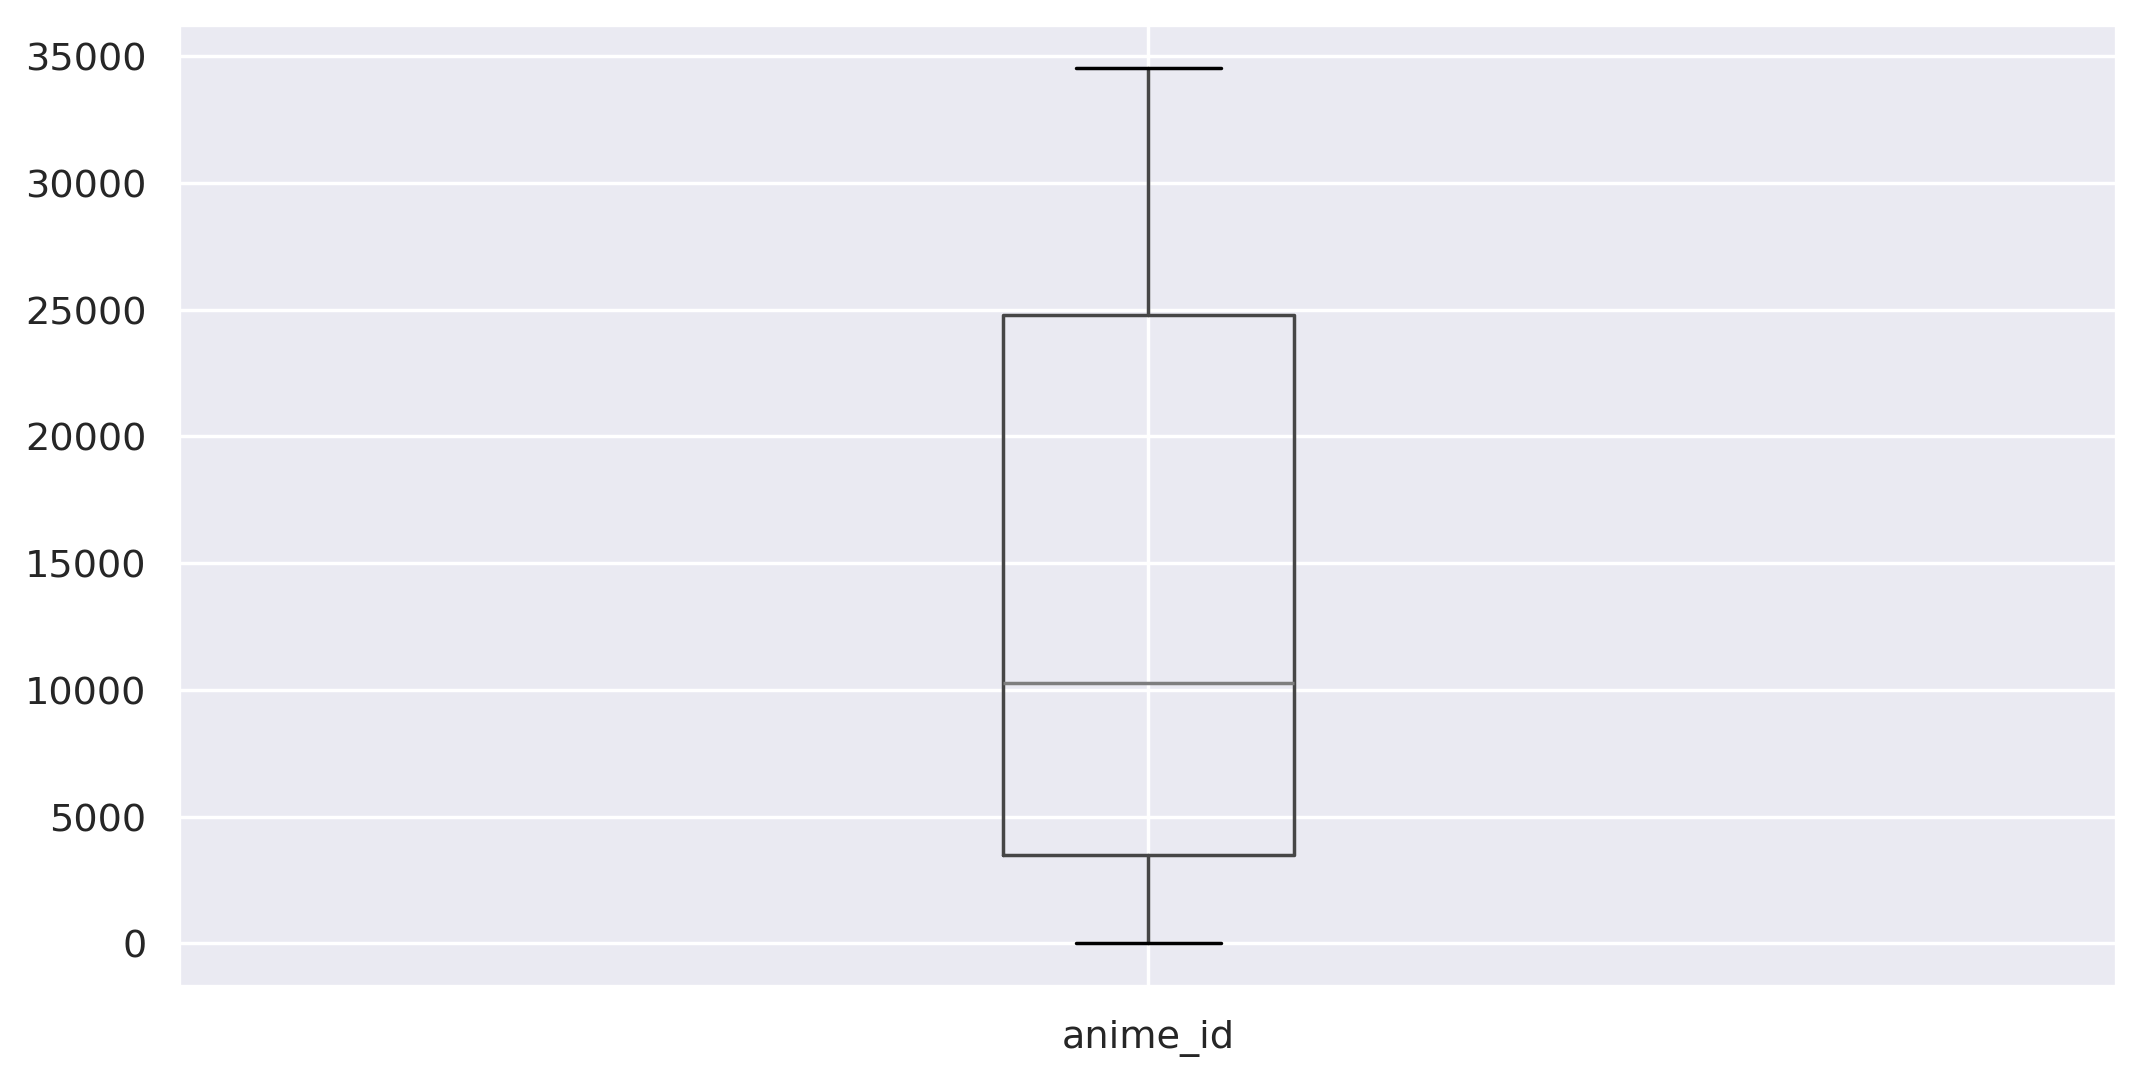

In [ ]:
df.boxplot(['anime_id'])

<Axes: >

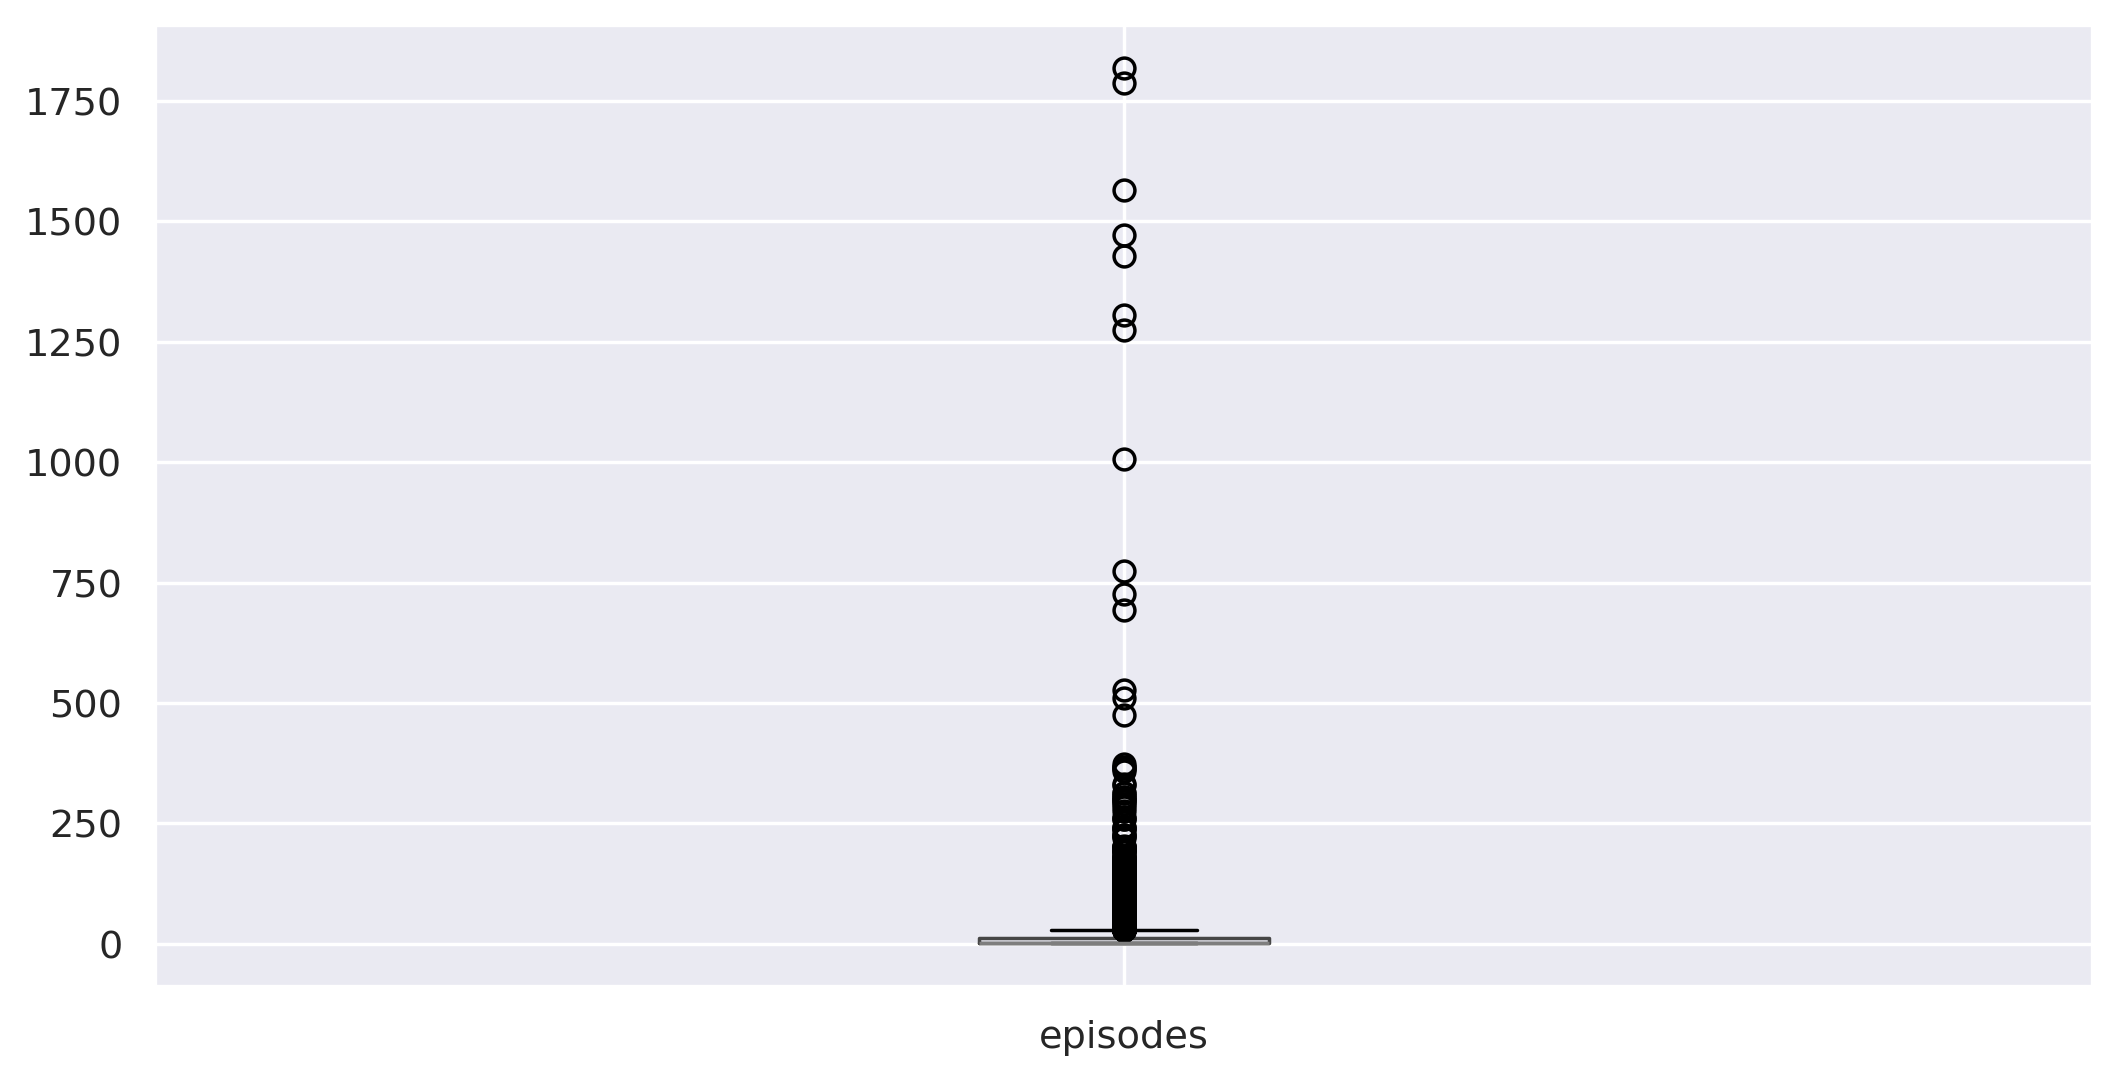

In [ ]:
df.boxplot(['episodes'])

<Axes: >

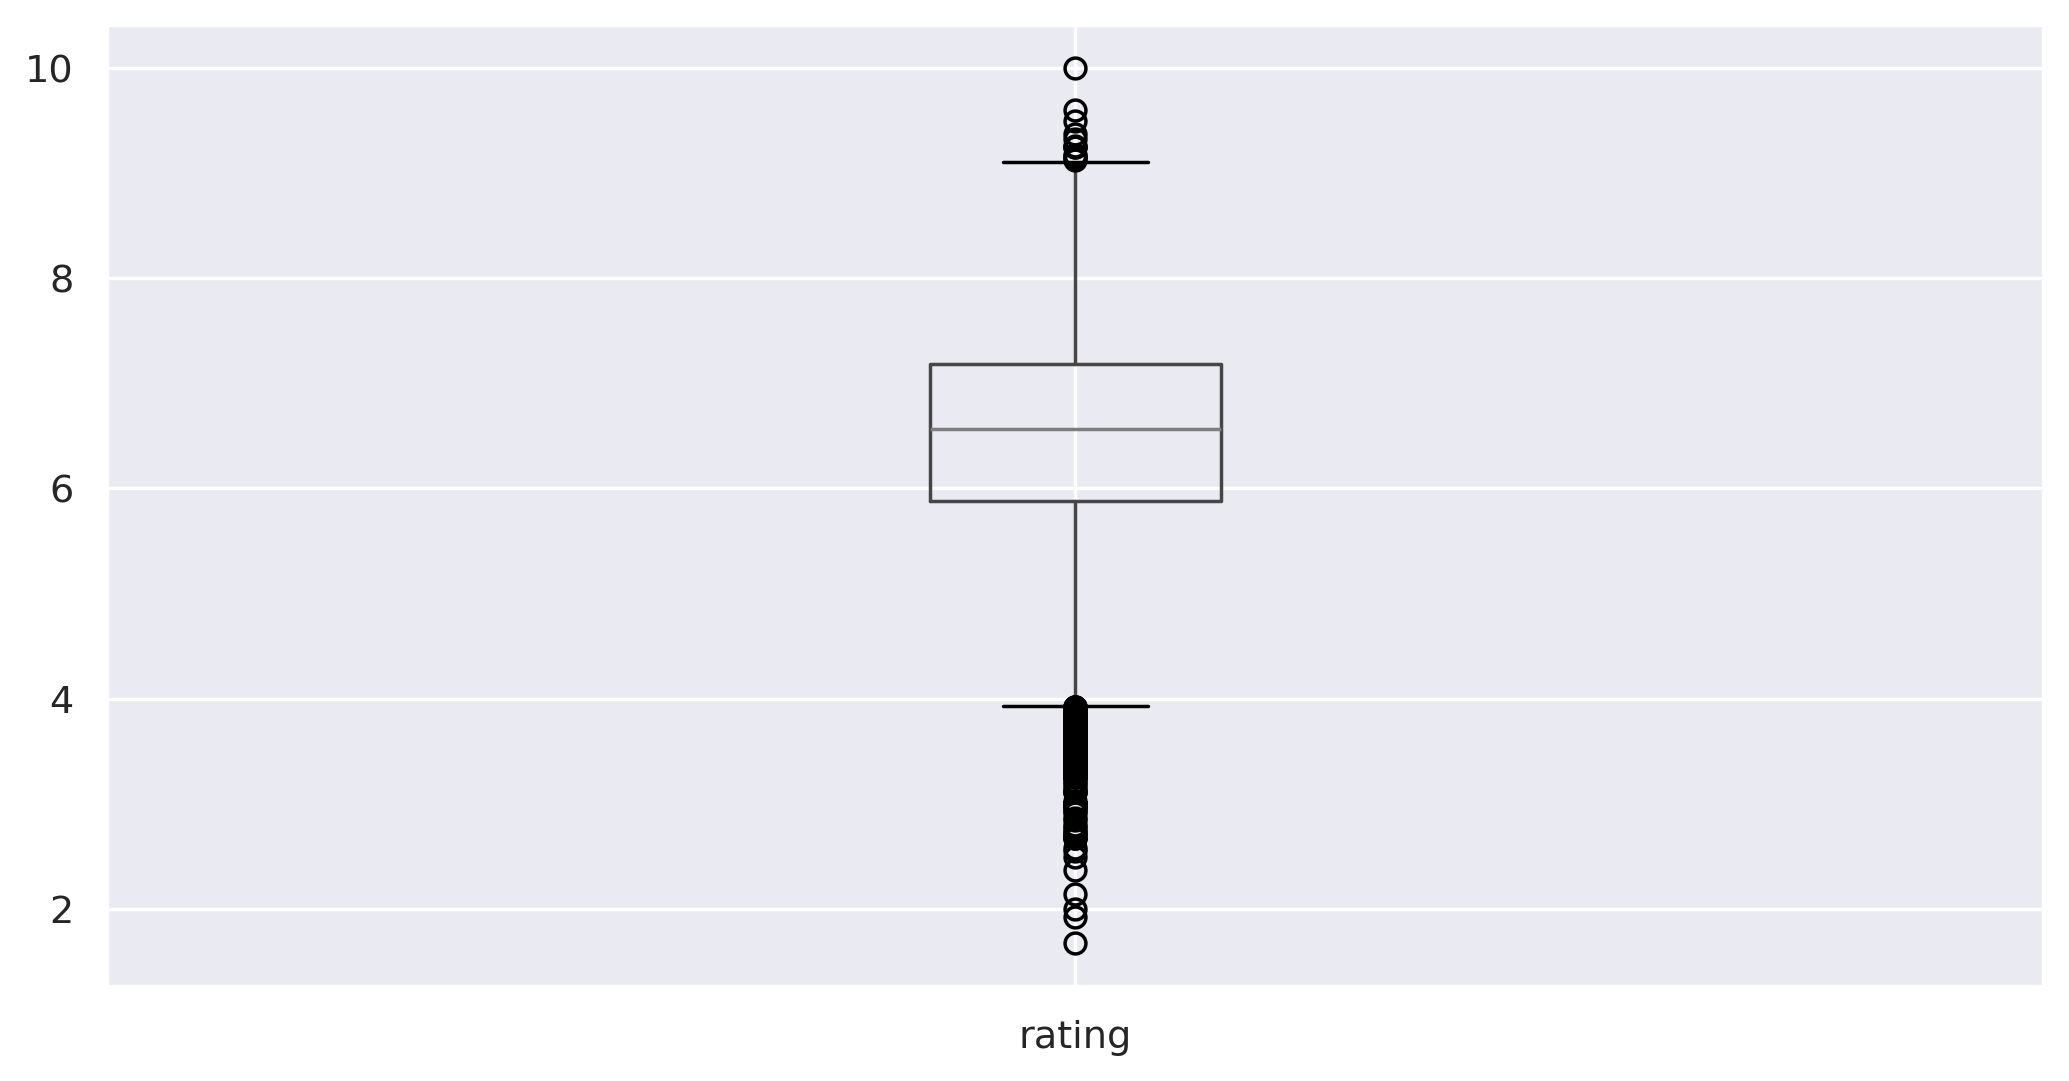

In [ ]:
df.boxplot(['rating'])



* rating column has outliers at lower as well as higher side

<Axes: >

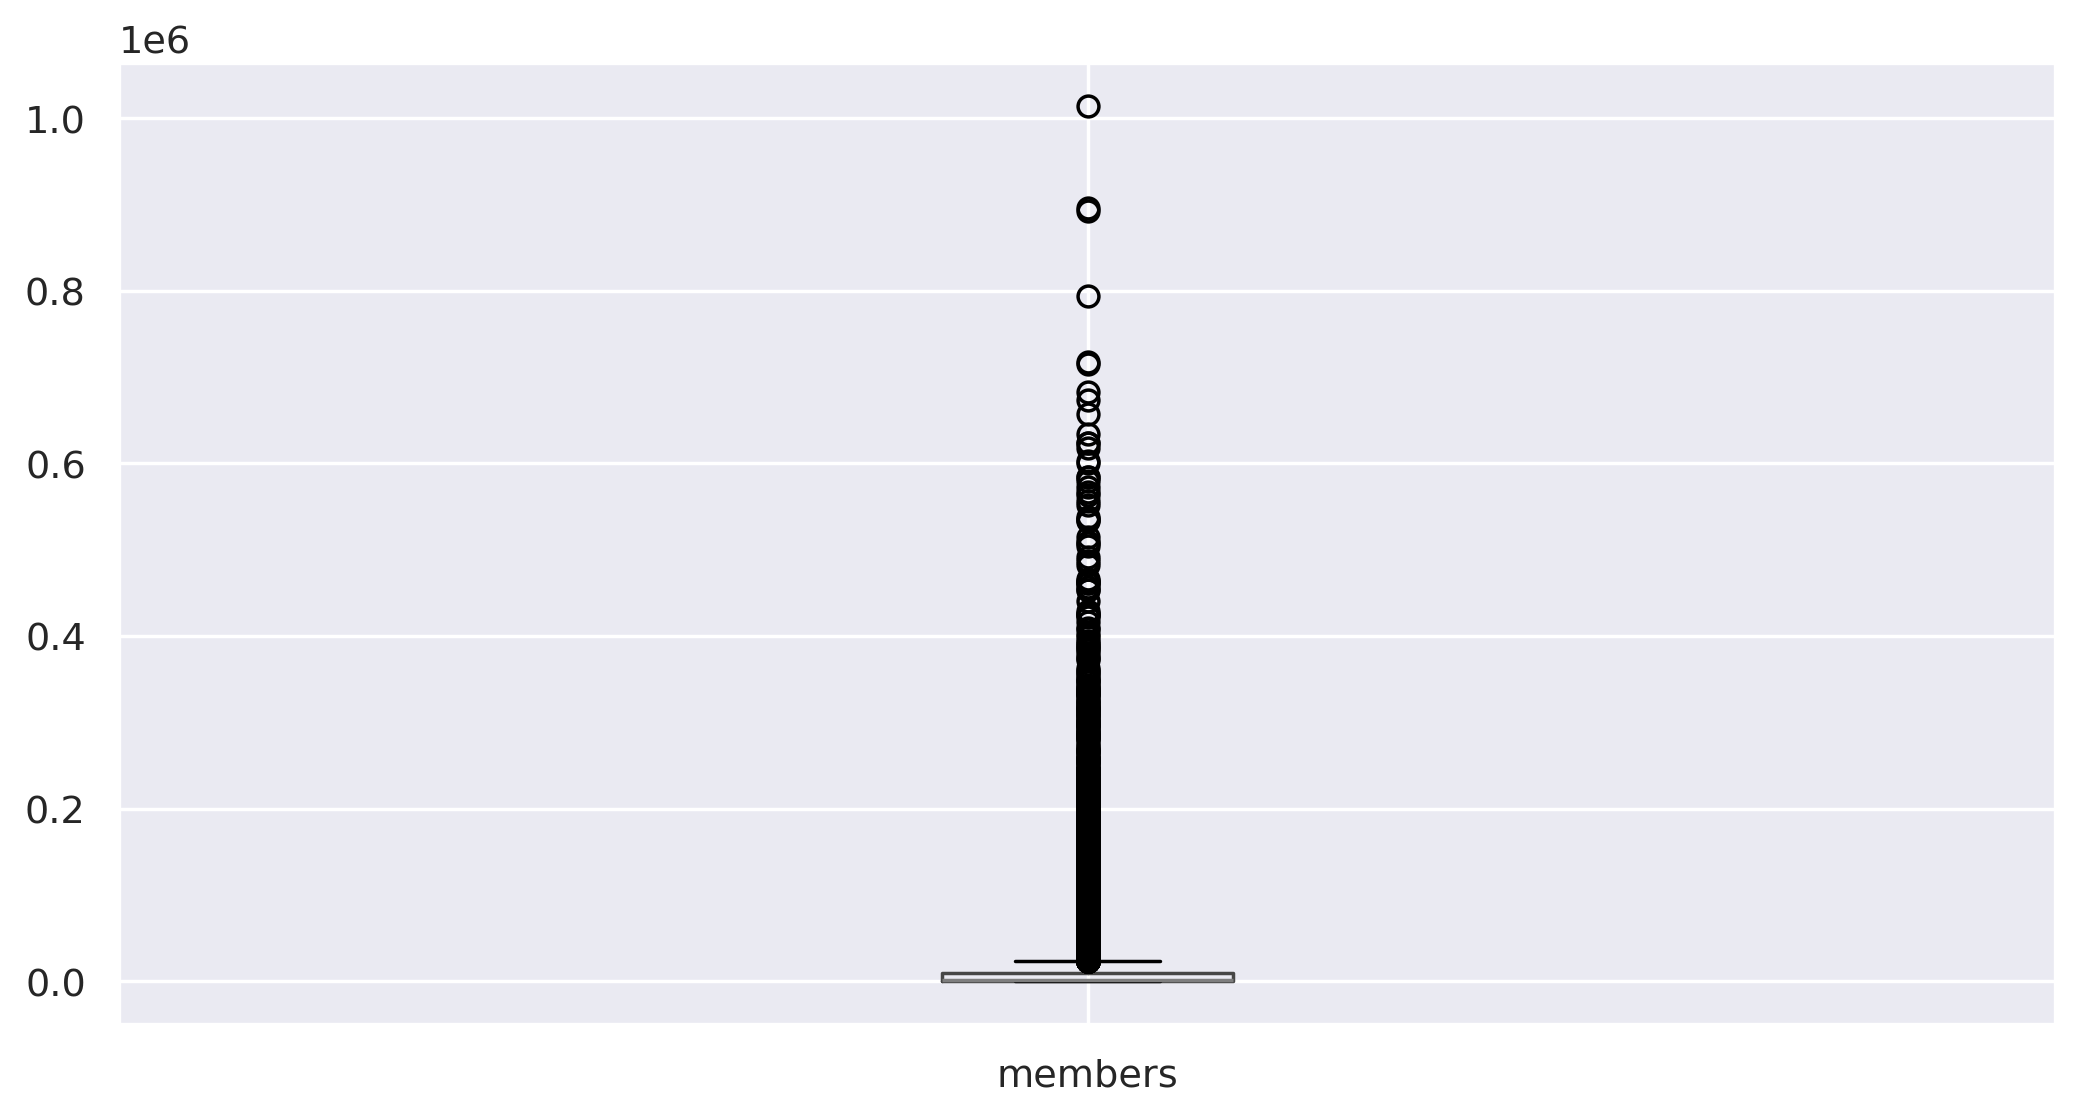

In [ ]:
df.boxplot(['members'])

member column has outliers at higher side

In [ ]:

df.describe(include='object')

,name,genre,type
count,12294,12232,12269
unique,12292,3264,6
top,Shi Wan Ge Leng Xiaohua,Hentai,TV
freq,2,823,3787


In [ ]:
df['type'].value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


In [ ]:

df[df['name']=='Shi Wan Ge Leng Xiaohua']

,anime_id,name,genre,type,episodes,rating,members
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12.0,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1.0,7.07,110


# **Data Visualization**
# ***Countplot***

<Axes: xlabel='count', ylabel='type'>

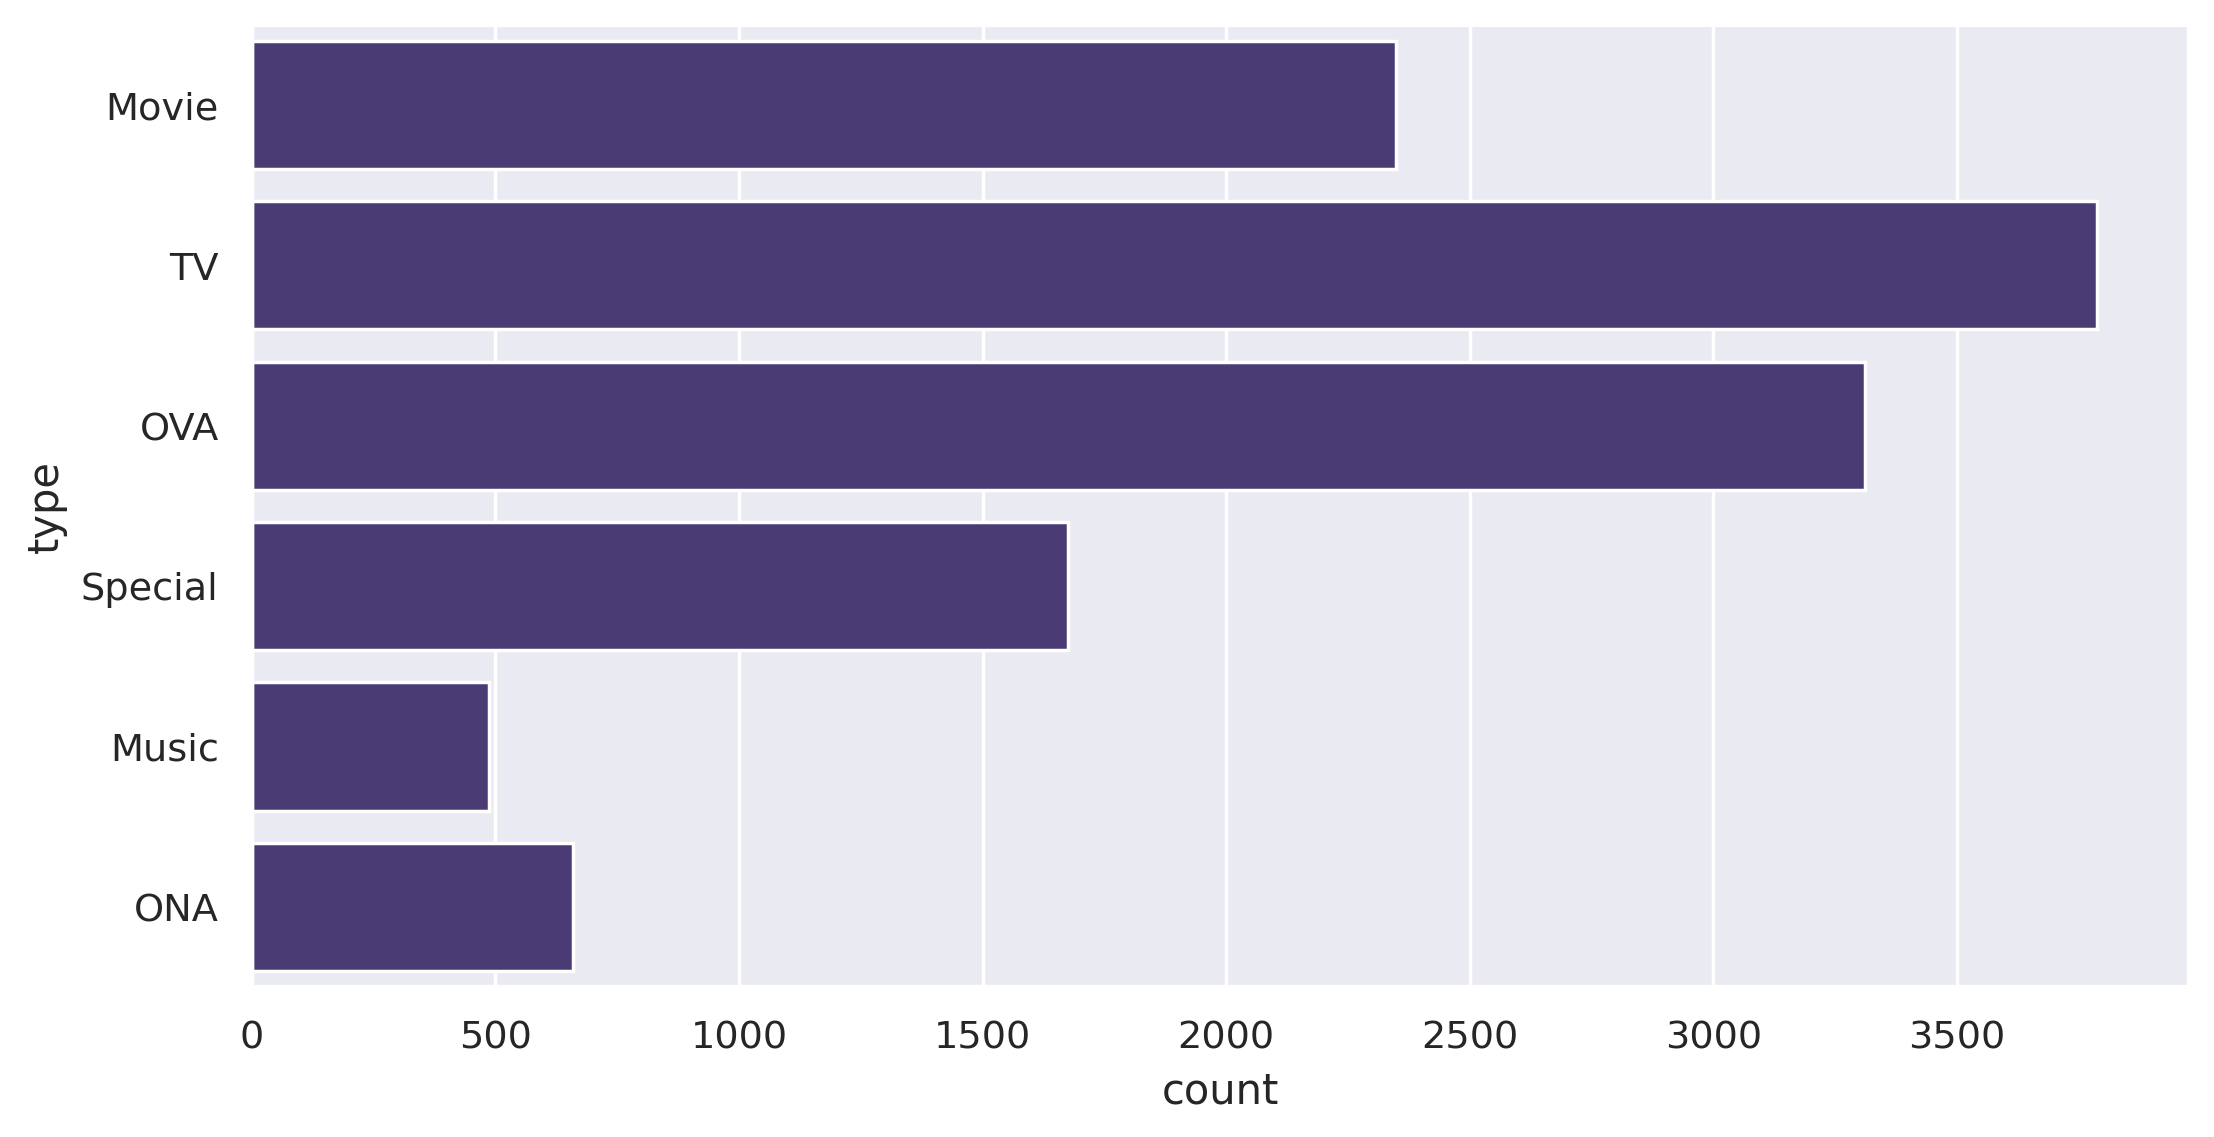

In [ ]:

sns.countplot(y = df['type'])

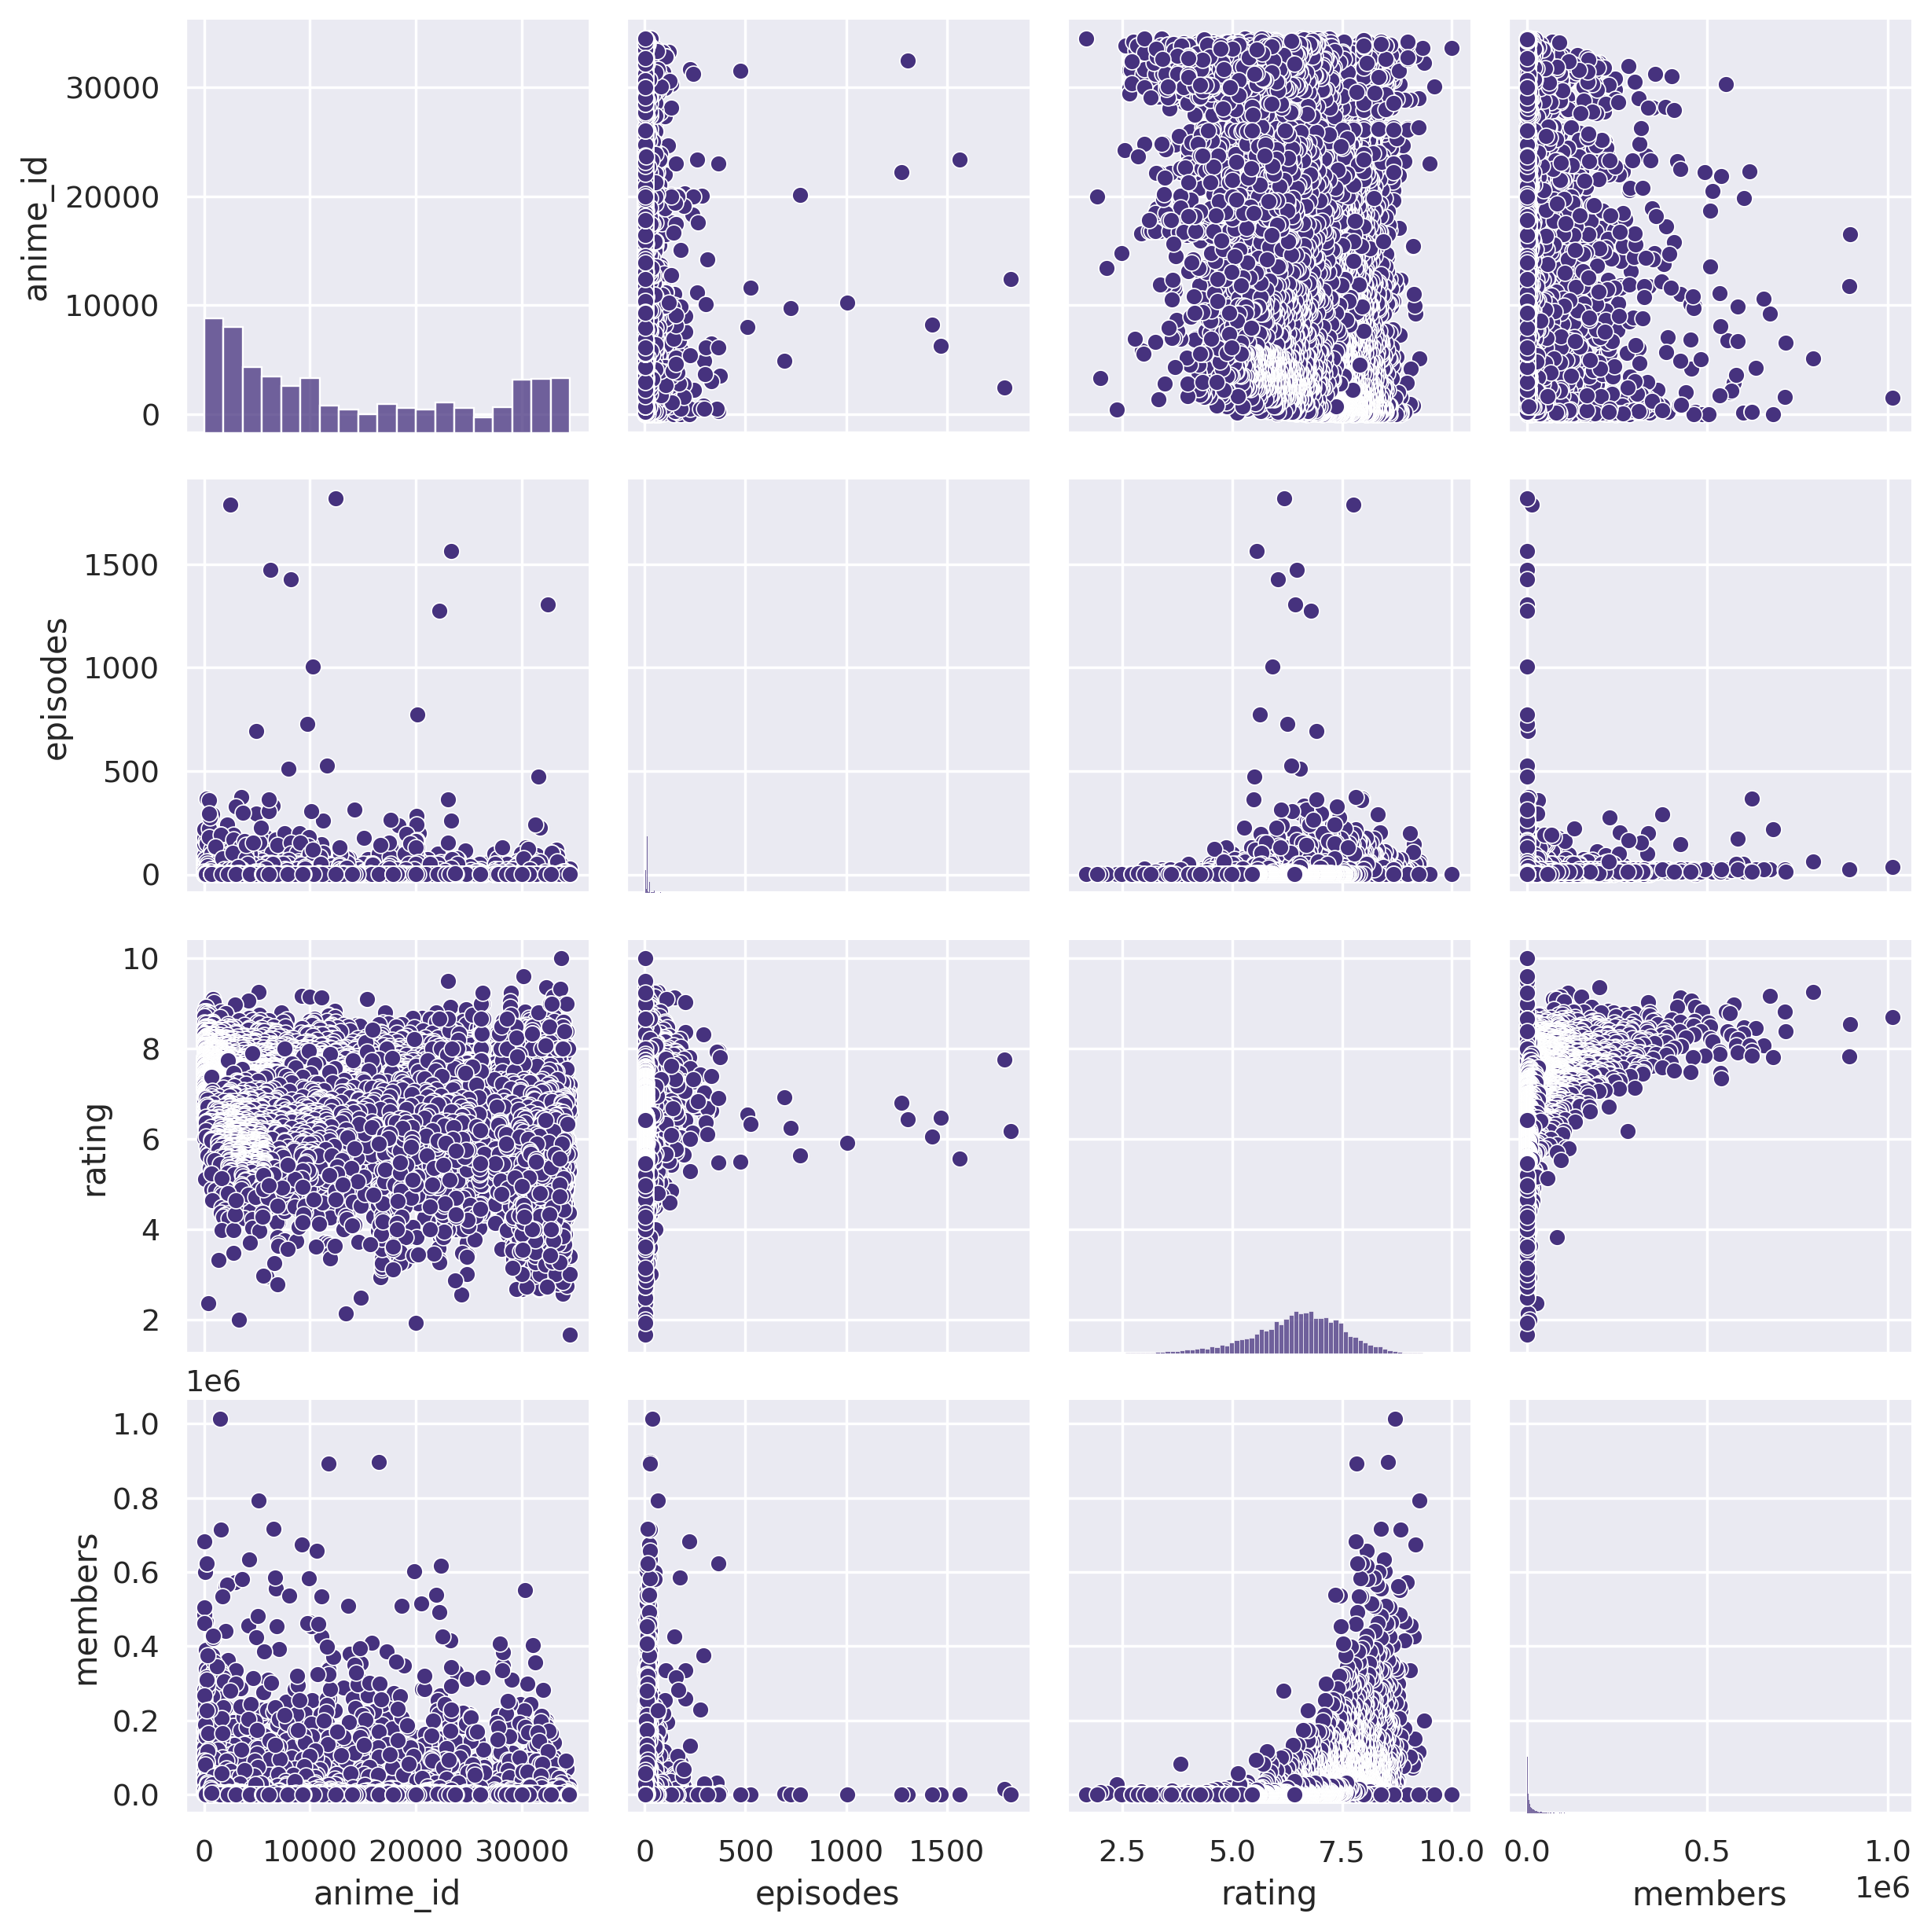

In [ ]:
sns.pairplot(df)

# **Outlier**
# **We will use Capping method to treat outliers**

In [ ]:
df['episodes']


,episodes
0,1.0
1,64.0
2,51.0
3,24.0
4,51.0
...,...
12289,1.0
12290,1.0
12291,4.0
12292,1.0


In [ ]:
# Outliers are present in the following columns
outliers_columns = ['episodes','members']

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(df, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    df.loc[df[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    df.loc[df[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

<Axes: >

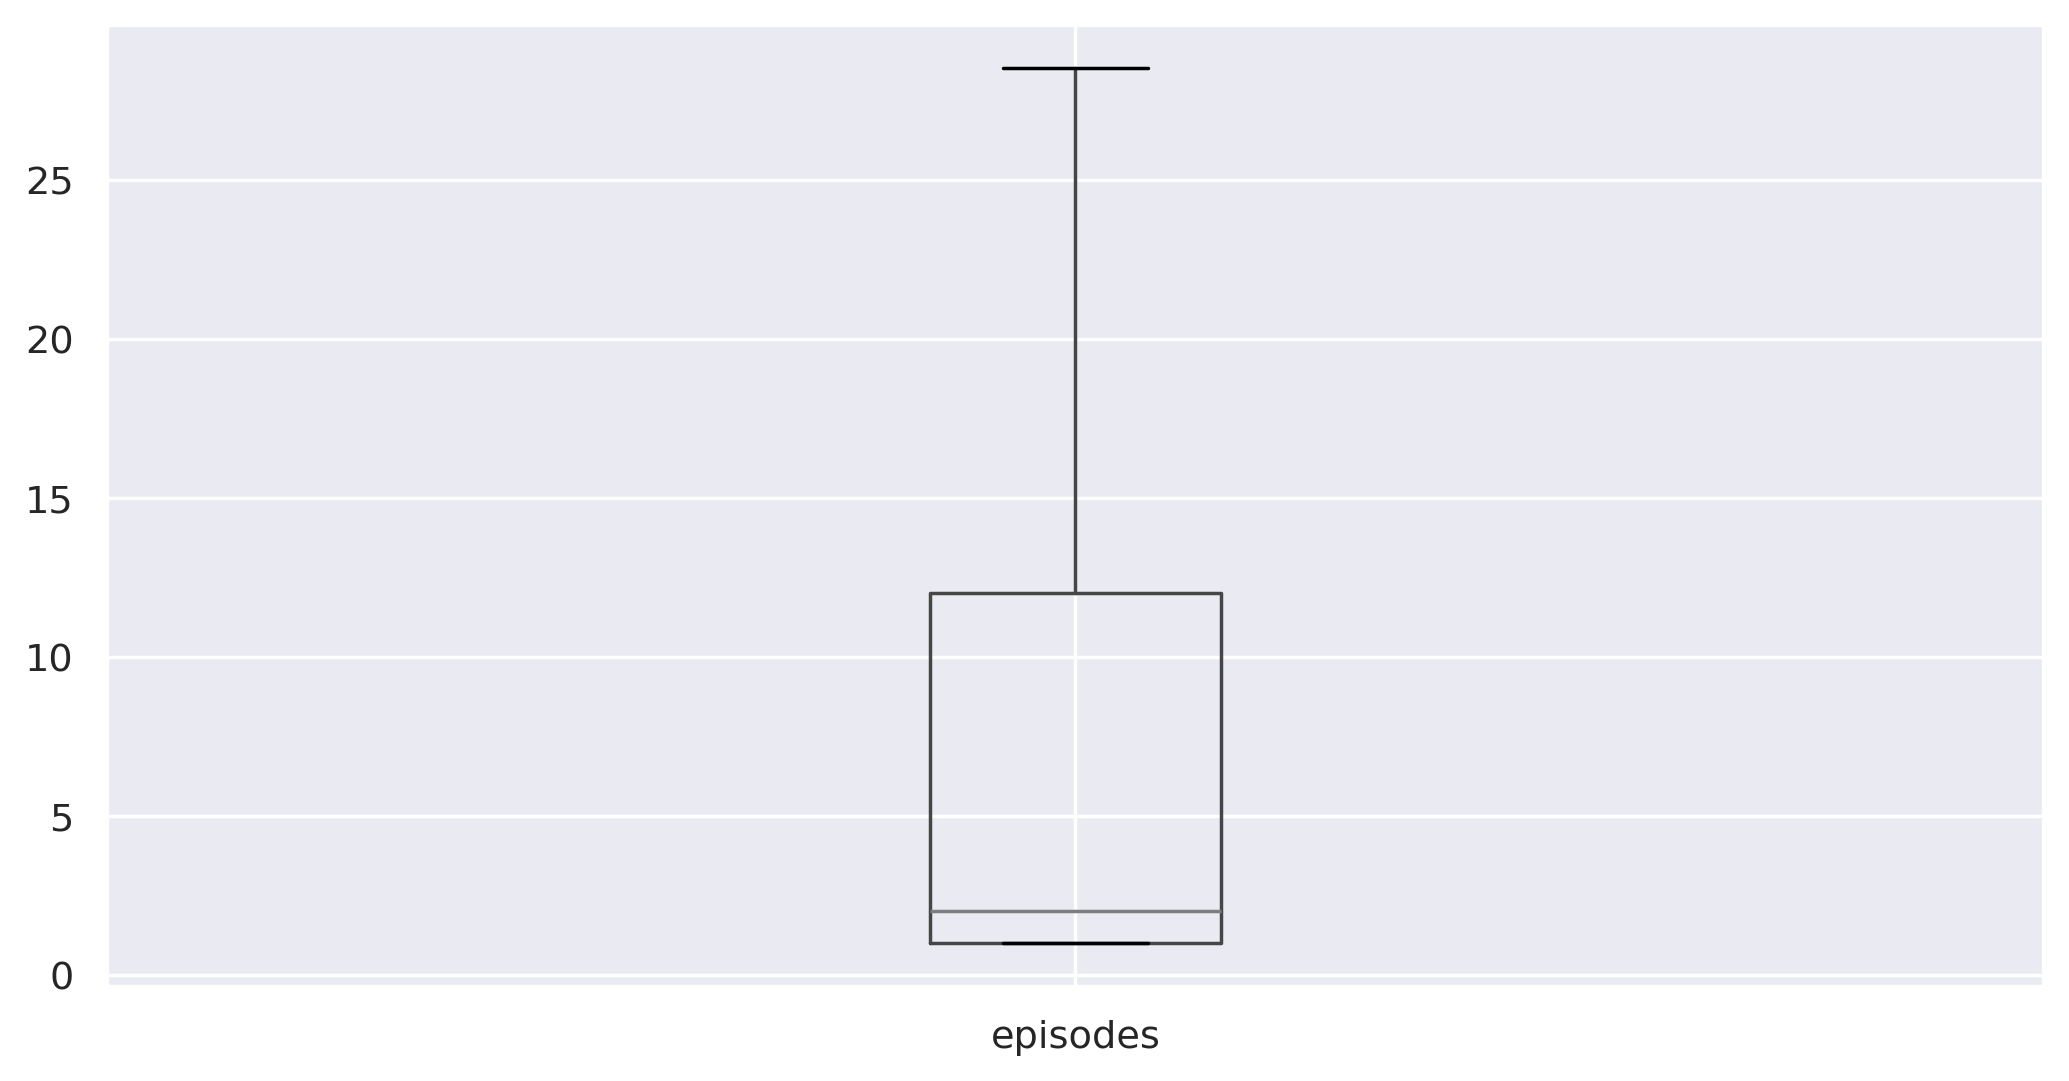

In [ ]:
df.boxplot(['episodes'])

<Axes: >

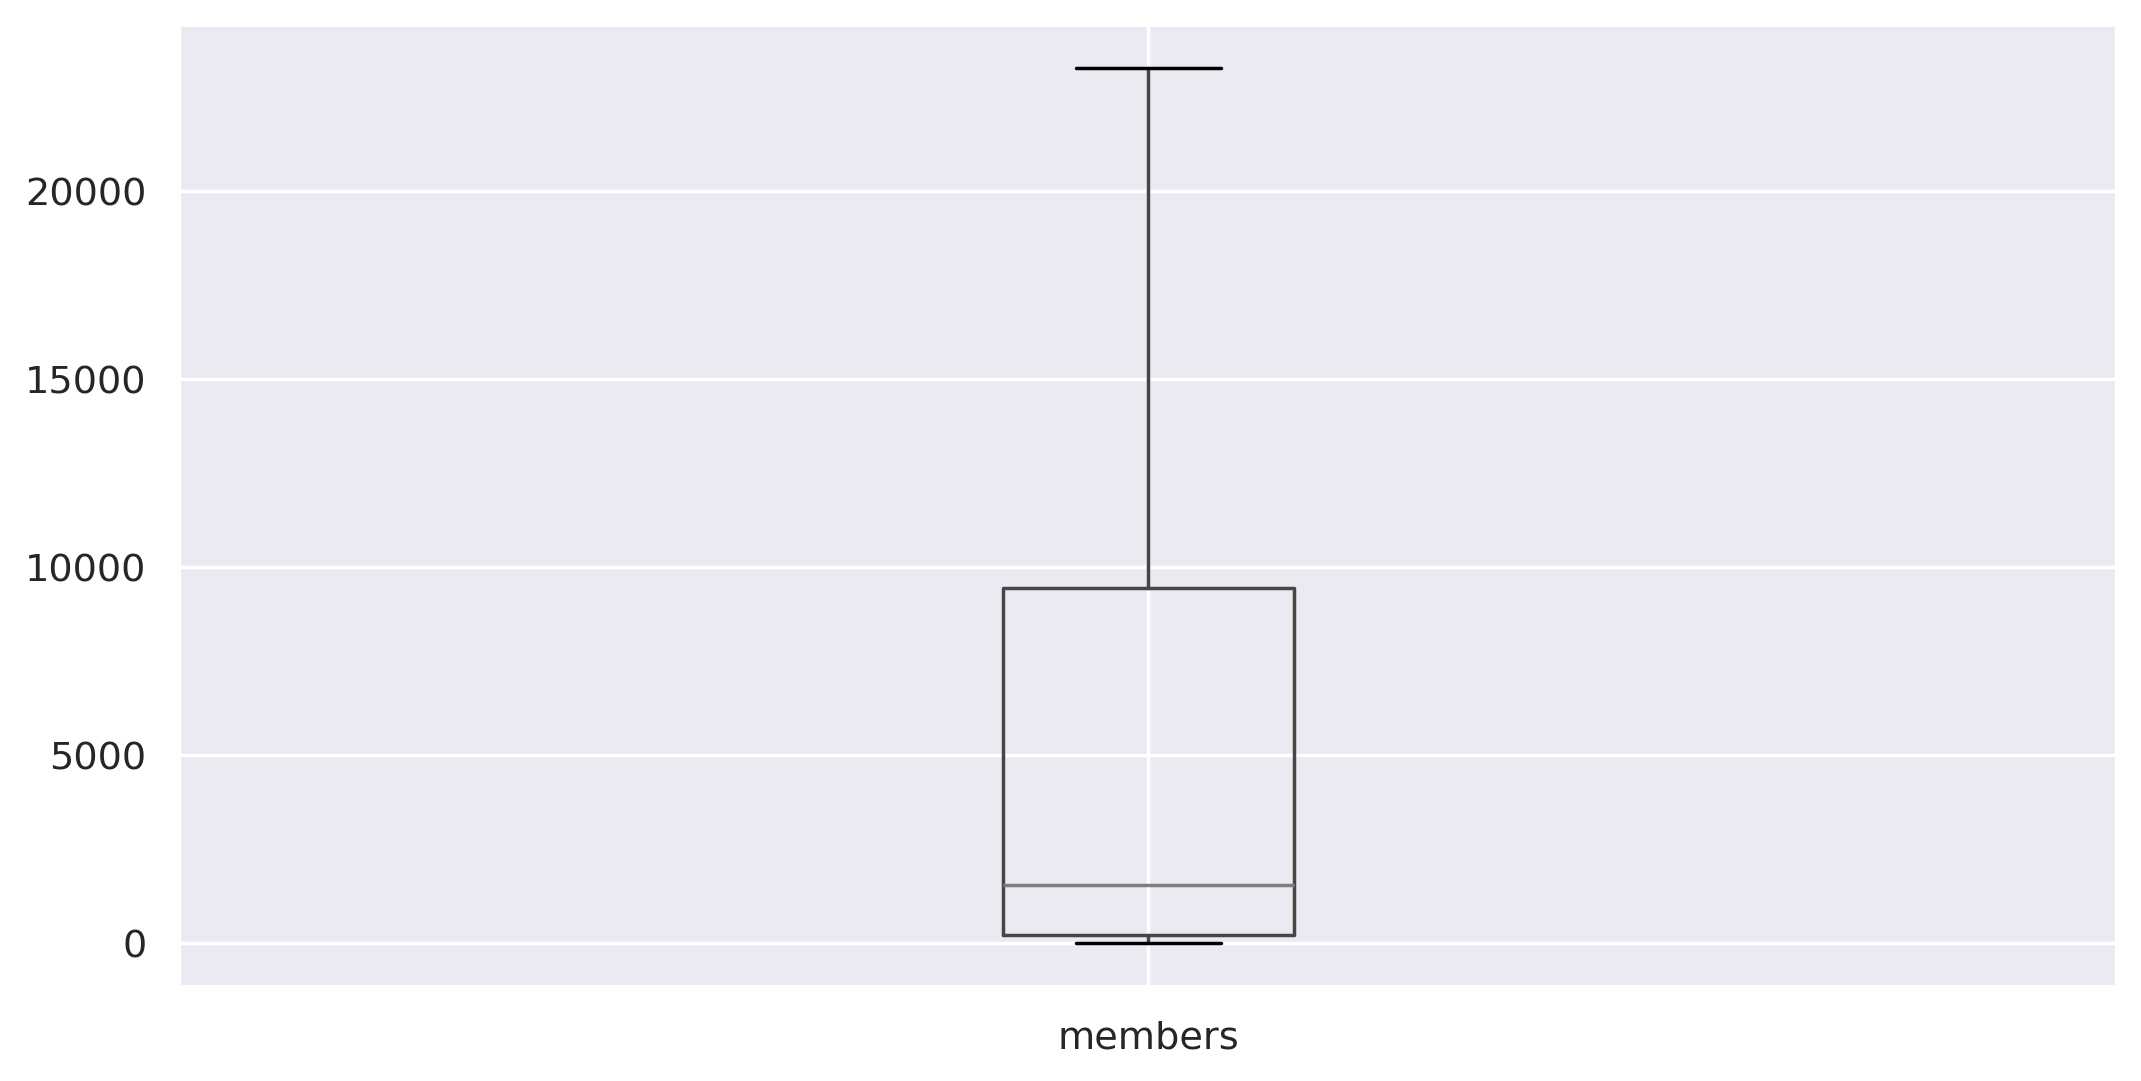

In [ ]:
df.boxplot(['members'])

# **Missing Value**

In [ ]:
df.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,340
rating,230
members,0


In [ ]:
df.groupby(["type"])["episodes"].value_counts()

type   episodes
Movie  1.0         2311
       2.0            8
       3.0            7
       12.0           4
       5.0            3
                   ... 
TV     28.0           6
       19.0           4
       7.0            3
       17.0           3
       2.0            1
Name: count, Length: 118, dtype: int64

In [ ]:
df.groupby(["type"])["episodes"].value_counts()

type   episodes
Movie  1.0         2311
       2.0            8
       3.0            7
       12.0           4
       5.0            3
                   ... 
TV     28.0           6
       19.0           4
       7.0            3
       17.0           3
       2.0            1
Name: count, Length: 118, dtype: int64

In [ ]:
df.dropna(subset=['type'], inplace=True)
df.isna().sum()

,0
anime_id,0
name,0
genre,59
type,0
episodes,315
rating,205
members,0


In [ ]:
show_types = list((df['type'].value_counts()).keys())

for key in show_types:
    df.loc[(df['type']==key) & (df['episodes'].isna()), 'episodes']=df[df['type']==key]['episodes'].median()

df.isna().sum()

,0
anime_id,0
name,0
genre,59
type,0
episodes,0
rating,205
members,0


Null values in genre we will replace by Unknown, as it is not feasible to predict genre from other data

In [ ]:
df['genre'].fillna('Unknown', inplace=True)
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,205
members,0


Null entries in rating column we will replace by 0

In [ ]:
df['rating'].fillna(0, inplace=True)
df.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


# **Feature Extraction:**
Decide on the features that will be used for computing similarity (e.g., genres, user ratings). Convert categorical features into numerical representations if necessary. Normalize numerical features if required.

In [ ]:
df1 = df['genre'].str.get_dummies(sep=', ')

In [ ]:
new_df1 = pd.concat([df1, df], axis=1, join='inner')
new_df1

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,23255
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,28.5,9.26,23255
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,28.5,9.25,23255
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,23255
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,28.5,9.16,23255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5543,Under World,Hentai,OVA,1.0,4.28,183
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175


In [ ]:
new_df1.columns

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'Yuri',
       'anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'],
      dtype='object')

In [ ]:
new_df1.drop(columns=['name','genre','members','episodes'], inplace=True)

In [ ]:
new_df2 = pd.get_dummies(new_df1, columns = ['type'])
new_df2

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,anime_id,rating,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,0,0,0,0,0,1,0,0,0,...,0,0,32281,9.37,True,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,5114,9.26,False,False,False,False,False,True
2,1,0,0,1,0,0,0,0,0,0,...,0,0,28977,9.25,False,False,False,False,False,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,9253,9.17,False,False,False,False,False,True
4,1,0,0,1,0,0,0,0,0,0,...,0,0,9969,9.16,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,9316,4.15,False,False,False,True,False,False
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,5543,4.28,False,False,False,True,False,False
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,5621,4.88,False,False,False,True,False,False
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,6133,4.98,False,False,False,True,False,False


We will only Recommend the anime which got good ratings(lets fix ratings above 8)

In [ ]:
new_df = new_df2[new_df2['rating']>=8]

Now we will drop the rating column

In [ ]:
new_df.drop(columns=['rating'], inplace=True)

In [ ]:
new_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,32281,True,False,False,False,False,False
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,5114,False,False,False,False,False,True
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,28977,False,False,False,False,False,True
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9253,False,False,False,False,False,True
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,9969,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,0,1,0,0,0,0,0,0,1,0,...,0,0,0,33762,False,False,True,False,False,False
10831,0,1,0,0,0,0,0,0,0,0,...,0,0,0,23351,False,False,False,False,False,True
10844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,33828,True,False,False,False,False,False
10847,0,0,0,0,0,0,1,0,0,0,...,0,0,0,26097,False,False,False,True,False,False


# **Model Building**

In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:

pivot = new_df.drop(columns=['anime_id'])

In [ ]:
final_df = np.round(pairwise_distances(pivot,metric='cosine'),4)
final_df

array([[0.    , 0.8419, 1.    , ..., 0.6838, 0.7418, 1.    ],
       [0.8419, 0.    , 0.625 , ..., 1.    , 0.7959, 1.    ],
       [1.    , 0.625 , 0.    , ..., 0.75  , 1.    , 1.    ],
       ...,
       [0.6838, 1.    , 0.75  , ..., 0.    , 1.    , 1.    ],
       [0.7418, 0.7959, 1.    , ..., 1.    , 0.    , 0.5918],
       [1.    , 1.    , 1.    , ..., 1.    , 0.5918, 0.    ]])

In [ ]:
sim = 1 - final_df
sim

array([[1.    , 0.1581, 0.    , ..., 0.3162, 0.2582, 0.    ],
       [0.1581, 1.    , 0.375 , ..., 0.    , 0.2041, 0.    ],
       [0.    , 0.375 , 1.    , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.3162, 0.    , 0.25  , ..., 1.    , 0.    , 0.    ],
       [0.2582, 0.2041, 0.    , ..., 0.    , 1.    , 0.4082],
       [0.    , 0.    , 0.    , ..., 0.    , 0.4082, 1.    ]])

In [ ]:
np.fill_diagonal(sim,0)
sim

array([[0.    , 0.1581, 0.    , ..., 0.3162, 0.2582, 0.    ],
       [0.1581, 0.    , 0.375 , ..., 0.    , 0.2041, 0.    ],
       [0.    , 0.375 , 0.    , ..., 0.25  , 0.    , 0.    ],
       ...,
       [0.3162, 0.    , 0.25  , ..., 0.    , 0.    , 0.    ],
       [0.2582, 0.2041, 0.    , ..., 0.    , 0.    , 0.4082],
       [0.    , 0.    , 0.    , ..., 0.    , 0.4082, 0.    ]])

In [ ]:
similarity = pd.DataFrame(sim)
similarity

,0,1,2,3,4,5,6,7,8,9,...,617,618,619,620,621,622,623,624,625,626
0,0.0000,0.1581,0.0000,0.0000,0.0000,0.3651,0.0000,0.2000,0.1581,0.0000,...,0.3162,0.0000,0.0000,0.2582,0.2582,0.0000,0.1826,0.3162,0.2582,0.0000
1,0.1581,0.0000,0.3750,0.2041,0.3750,0.4330,0.6325,0.3162,0.2500,0.3750,...,0.0000,0.2041,0.6124,0.2041,0.2041,0.4082,0.2887,0.0000,0.2041,0.0000
2,0.0000,0.3750,0.0000,0.4082,1.0000,0.4330,0.4743,0.1581,0.8750,1.0000,...,0.0000,0.4082,0.2041,0.0000,0.0000,0.0000,0.1443,0.2500,0.0000,0.0000
3,0.0000,0.2041,0.4082,0.0000,0.4082,0.2357,0.2582,0.2582,0.2041,0.4082,...,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000
4,0.0000,0.3750,1.0000,0.4082,0.0000,0.4330,0.4743,0.1581,0.8750,1.0000,...,0.0000,0.4082,0.2041,0.0000,0.0000,0.0000,0.1443,0.2500,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.0000,0.4082,0.0000,0.0000,0.0000,0.0000,0.2582,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.6667,0.0000,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000
623,0.1826,0.2887,0.1443,0.2357,0.1443,0.1667,0.3651,0.0000,0.0000,0.1443,...,0.0000,0.2357,0.4714,0.0000,0.0000,0.2357,0.0000,0.0000,0.0000,0.0000
624,0.3162,0.0000,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.5000,0.2500,...,0.5000,0.4082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
625,0.2582,0.2041,0.0000,0.0000,0.0000,0.2357,0.0000,0.5164,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.4082


# **Find out similar anime**

In [ ]:
# Get anime id
def get_anime_id(df,name):
    return df[df["name"]==name]['anime_id'].to_list()

# Print similar animes by name
def print_similar_animes(data,sim, query):
    found_id = get_anime_id(data,query)
    sim_id = sim[found_id]
    print(found_id,':',sim_id)
    for id in sim_id:
        print(data[data['anime_id']==id]["name"])

In [ ]:
print_similar_animes(data = df,sim = similarity.idxmax(), query="Mononoke Hime")

[164] : 164    248
dtype: int64
3945    Ichigo 100%
Name: name, dtype: object


In [ ]:
df[(df['anime_id'] == 164) | (df['anime_id'] == 9204)]

,anime_id,name,genre,type,episodes,rating,members
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1.0,8.81,23255
385,9204,Omae Umasou da na,"Action, Adventure, Fantasy, Kids",Movie,1.0,8.13,6645


# **1. Can you explain the difference between user-based and item-based collaborative filtering?**


Collaborative filtering is a technique used in recommendation systems that makes automatic predictions about a user's interests based on the preferences of many users.

There are two main types:

User-Based Collaborative Filtering
This method finds users who are similar to the target user and recommends items that those similar users have liked.

How it works:
If User A and User B have similar viewing or purchasing behavior, and User B likes an item that User A hasn't interacted with, the system may recommend that item to User A.

Use Case Example:
“People like you also watched this movie.”

Drawback:
Doesn’t scale well when the number of users increases, and it may perform poorly when user activity is sparse (cold start problem).

Item-Based Collaborative Filtering
This method finds similar items based on how users have rated or interacted with them, and recommends those items to the user.

How it works:
If a user liked Item A, and Item A is similar to Item B (based on ratings by other users), then Item B may be recommended to the user.

Use Case Example:
“Users who liked this item also liked...”

Advantage:
More stable and scalable than user-based filtering, especially when there are many users but fewer items.

# **2. What is collaborative filtering, and how does it work?**

Collaborative filtering is a recommendation technique that uses the collective preferences or behaviors of a group of users to suggest items to others. It assumes that users who agreed in the past will likely agree again in the future.

How It Works:
Data Collection:
It starts with user-item interactions like ratings, clicks, purchases, or views.

Similarity Calculation:
The algorithm computes similarity either between users (user-based) or between items (item-based) using measures like cosine similarity, Pearson correlation, or Euclidean distance.

Recommendation Generation:
Based on these similarities, the system recommends items a user has not yet interacted with but are highly rated by similar users or similar to items the user already likes.

Types of Collaborative Filtering:
Memory-based: Uses all available data directly (user-user or item-item similarities).

Model-based: Uses machine learning algorithms like matrix factorization or deep learning to predict user preferences.

Advantages:
Doesn’t require knowledge about the content of items.

Can discover complex patterns based on real user behavior.

Disadvantages:
Struggles with cold start (new user or item), data sparsity, and scalability in large datasets.